In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [53]:
datos = np.loadtxt('datosRegresionMultiple.txt')
datos = np.transpose(datos)
x = datos[1]
y = datos[0]

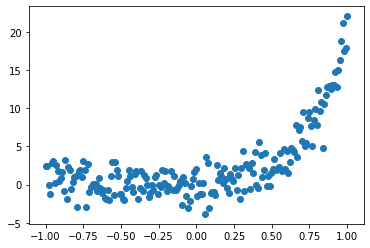

In [54]:
# Visualización de las información para generar el modelo.
plt.scatter(x, y)
plt.show()

In [43]:
# Definimos los hiper-parámetros.
learning_rate = 0.01
epochs = 2000
m = len(y)
print(m)

200


In [44]:
# Definimos los Tensores
X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)
T = tf.Variable([0.]*7, dtype=tf.float32)

In [45]:
def modelo(T, X):
    # Calculamos el grado del polinomio.
    n = len(T.numpy())
    m = 0
    for i in range(n):
        m = m + T[i]*(X**i)
    return m

def costo(T, X, Y):
    return tf.reduce_sum(tf.square(modelo(T, X) - Y))/(2*m)

def costo_minimizar():
    return tf.reduce_sum(tf.square(modelo(T, X) - Y))/(2*m)

train_op = tf.keras.optimizers.SGD(learning_rate)

In [46]:
hist_error = []
for epoch in range(epochs):
    error = costo(T, X, Y).numpy()
    hist_error.append(error)
    train_op.minimize(costo_minimizar, var_list=[T])
print(T.numpy(), error)

[0.0440433 2.347275  3.7988315 2.9941008 3.5918121 2.8740299 3.2236238] 1.3608154


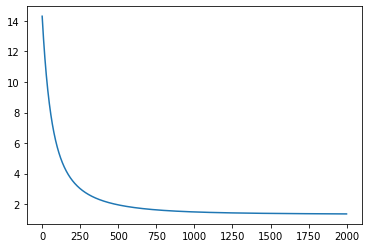

In [51]:
plt.plot(hist_error)
plt.show()